# MVP Model Inference

The purpose of this notebook is build utlity functions for generating predictions from a pre-trained setlist model

In [579]:
%load_ext autoreload
%autoreload 2

import os
import sys
import numpy as np
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences

module_path = os.path.abspath(os.path.join('../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import src

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load in Setlist Data

In [2]:
# load X data

X_test = src.util.load_pickle_object('../data/processed/mvp-setlist-modeling/seqlen-150/X_test.pkl')

In [3]:
X_test.shape

(3529, 150)

##### The testing data consists of ~3.5k sequences of 150 encoded songs

In [4]:
X_test[-1]

array([576,   9, 181,  57, 481,  15, 118, 325, 727, 451, 320, 817, 699,
       272,   7, 148, 274,   8, 729,  46, 118, 855,  96, 143, 239, 745,
       533, 194, 576,   9, 545, 733,  15, 707, 186, 624, 305, 861, 384,
       148,  67,   7, 827,   8, 148, 733, 674, 729,  46, 545, 384, 451,
       320, 817, 746, 727, 533,   9, 120, 571, 481,  96, 178, 686, 745,
       855, 647, 291, 624,  15, 167,   7, 691,   8, 272, 213, 178,  96,
       481, 551, 181, 194, 727, 576,   9, 380,  92, 733,  15, 241, 861,
         7, 274,   8, 533, 855, 226, 807, 786, 792, 733, 674, 686, 577,
       861, 274,   9, 256, 451, 320, 817, 369, 727, 647, 148, 384, 554,
       124, 305, 347,   7, 120, 675, 827,   8,   7, 167,   8, 272, 861,
       807, 686, 533, 241, 551, 181, 120,   9, 451, 320, 817, 213, 792,
       745, 727, 325, 274,   7, 148, 305])

In [5]:
print(X_test[-1])

[576   9 181  57 481  15 118 325 727 451 320 817 699 272   7 148 274   8
 729  46 118 855  96 143 239 745 533 194 576   9 545 733  15 707 186 624
 305 861 384 148  67   7 827   8 148 733 674 729  46 545 384 451 320 817
 746 727 533   9 120 571 481  96 178 686 745 855 647 291 624  15 167   7
 691   8 272 213 178  96 481 551 181 194 727 576   9 380  92 733  15 241
 861   7 274   8 533 855 226 807 786 792 733 674 686 577 861 274   9 256
 451 320 817 369 727 647 148 384 554 124 305 347   7 120 675 827   8   7
 167   8 272 861 807 686 533 241 551 181 120   9 451 320 817 213 792 745
 727 325 274   7 148 305]


## Load Model and Encodings

In [6]:
# load model
model = load_model('../models/mvp-setlist-modeling/model.nn_arch_2-150-seqlen-100-lstmunits-0.5-b_dropout-0.5-a_dropout.hdf5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [7]:
# load encoding mappings
idx_to_song = src.util.load_pickle_object('../data/processed/mvp-setlist-modeling/seqlen-150/idx_to_song.pkl')
song_to_idx = src.util.load_pickle_object('../data/processed/mvp-setlist-modeling/seqlen-150/song_to_idx.pkl')

### Test a prediction

In [8]:
# get an input sequence of the last show
test_seq = X_test[-69]

In [9]:
test_seq

array([245, 126,   7, 826,   8, 108, 531, 373, 538, 121, 720, 618, 647,
       482, 280, 624, 675,   9, 424, 167, 730, 364, 382, 364, 609, 533,
       398,  32,   7, 256,   8, 344, 181, 843, 855, 643, 247, 282, 576,
       291,   9, 321, 742, 541, 163, 741, 341, 710, 302, 360, 343,   4,
       596, 202,  62, 184, 743, 414, 546,  10, 861, 369,  13, 674,   7,
       474,   8, 787, 181, 535, 538, 619, 545, 691, 582,   9, 757, 373,
       727,  57, 729,  46, 729, 397, 299, 746,   7, 419,   8,  96, 577,
       690, 734, 364, 185, 432, 282, 124,   9, 247, 594, 861, 159, 861,
       663, 643,  15, 675,   7, 292,   8, 121, 451,  13, 531, 817, 720,
       618, 855, 657,  32, 226, 126,   9,  29, 167, 674, 792, 238, 627,
       245, 672, 307, 576,   7,  17, 274,   8, 473, 473, 407,  96, 279,
       545, 325, 690, 346, 647, 299,   9])

In [10]:
[idx_to_song[idx] for idx in test_seq]

['Frankenstein',
 'Chalk Dust Torture',
 '<ENCORE>',
 'While My Guitar Gently Weeps',
 '<SET1>',
 'Buried Alive',
 'Poor Heart',
 'Julius',
 'Punch You in the Eye',
 'Cars Trucks Buses',
 'The Horse',
 'Silent in the Morning',
 'Split Open and Melt',
 'NICU',
 'Gumbo',
 'Slave to the Traffic Light',
 'Sweet Adeline',
 '<SET2>',
 'Makisupa Policeman',
 'David Bowie',
 'The Mango Song',
 "It's Ice",
 'Kung',
 "It's Ice",
 'Shaggy Dog',
 'Possum',
 'Lifeboy',
 'Amazing Grace',
 '<ENCORE>',
 'Funky Bitch',
 '<SET1>',
 'Icculus',
 'Divided Sky',
 'Wilson',
 'Ya Mar',
 'Sparkle',
 'Free',
 'Guyute',
 'Run Like an Antelope',
 'Harpua',
 '<SET2>',
 'I Am the Sea',
 'The Real Me',
 'Quadrophenia',
 'Cut My Hair',
 'The Punk Meets the Godfather',
 "I'm One",
 'The Dirty Jobs',
 'Helpless Dancer',
 'Is It In My Head?',
 "I've Had Enough",
 '5:15',
 'Sea and Sand',
 'Drowned',
 'Bell Boy',
 'Doctor Jimmy',
 'The Rock',
 'Love',
 "Reign O'er Me",
 '<SET3>',
 'You Enjoy Myself',
 'Jesus Just Left Ch

In [11]:
print(np.array([test_seq]))

[[245 126   7 826   8 108 531 373 538 121 720 618 647 482 280 624 675   9
  424 167 730 364 382 364 609 533 398  32   7 256   8 344 181 843 855 643
  247 282 576 291   9 321 742 541 163 741 341 710 302 360 343   4 596 202
   62 184 743 414 546  10 861 369  13 674   7 474   8 787 181 535 538 619
  545 691 582   9 757 373 727  57 729  46 729 397 299 746   7 419   8  96
  577 690 734 364 185 432 282 124   9 247 594 861 159 861 663 643  15 675
    7 292   8 121 451  13 531 817 720 618 855 657  32 226 126   9  29 167
  674 792 238 627 245 672 307 576   7  17 274   8 473 473 407  96 279 545
  325 690 346 647 299   9]]


In [12]:
np.array([test_seq]).shape

(1, 150)

In [19]:
# make prediction by feeding in a sequence of 150 encoded songs
next_song = model.predict_classes(np.array([test_seq]))

# lookup song name
idx_to_song[next_song.item()]

'Also Sprach Zarathustra'

In [174]:
test = model.predict_proba(np.array([test_seq]))
model.predict_proba(np.array([test_seq]))

array([[7.74376310e-12, 4.40974654e-05, 1.62160042e-11, 2.05082433e-05,
        2.22758993e-15, 5.62867244e-13, 6.60064304e-03, 2.53985141e-04,
        8.38450968e-01, 1.00849615e-03, 2.34085983e-05, 9.06937048e-02,
        7.68159314e-09, 1.11257774e-04, 4.61748442e-07, 3.31285788e-04,
        2.83828516e-10, 1.04127686e-10, 1.91995437e-04, 5.36694068e-14,
        8.01011993e-07, 3.85723581e-07, 6.49077776e-07, 3.02843484e-14,
        2.53630336e-15, 1.67192210e-17, 9.52485209e-07, 1.99224760e-05,
        5.14347977e-18, 6.44926477e-05, 5.17607405e-05, 8.60694083e-18,
        2.54217193e-05, 6.01351885e-11, 1.84232807e-08, 4.52733337e-12,
        1.82461208e-12, 4.84343728e-12, 3.97641315e-08, 1.28000111e-10,
        3.39590915e-05, 1.23102507e-06, 4.89154047e-07, 8.49834092e-12,
        1.69378764e-05, 1.36806455e-06, 4.76344648e-16, 4.22730081e-05,
        7.68312747e-10, 1.12486232e-05, 2.34346786e-17, 7.45499370e-19,
        9.72680255e-07, 1.38726328e-08, 1.32236009e-05, 2.602024

In [183]:
test[0].tolist()

[7.743763096035305e-12,
 4.4097465433878824e-05,
 1.6216004233848835e-11,
 2.050824332400225e-05,
 2.227589925127456e-15,
 5.628672441332361e-13,
 0.006600643042474985,
 0.00025398514117114246,
 0.8384509682655334,
 0.0010084961540997028,
 2.3408598281093873e-05,
 0.09069370478391647,
 7.681593139352572e-09,
 0.00011125777382403612,
 4.617484421487461e-07,
 0.0003312857879791409,
 2.8382851624542127e-10,
 1.0412768564060926e-10,
 0.0001919954374898225,
 5.3669406836461334e-14,
 8.010119927348569e-07,
 3.85723581075581e-07,
 6.490777764156519e-07,
 3.028434843394337e-14,
 2.5363033647320208e-15,
 1.6719221040744336e-17,
 9.524852089271008e-07,
 1.9922475985367782e-05,
 5.143479772797099e-18,
 6.449264765251428e-05,
 5.176074046175927e-05,
 8.606940832247974e-18,
 2.542171932873316e-05,
 6.013518849545818e-11,
 1.8423280678803167e-08,
 4.5273333693085505e-12,
 1.8246120760123663e-12,
 4.843437283186258e-12,
 3.976413154305192e-08,
 1.280001105108397e-10,
 3.395909152459353e-05,
 1.231025

In [166]:
np.sort(test)

array([[6.59179691e-26, 1.47005620e-24, 8.17557772e-24, 4.07834272e-23,
        3.04305985e-22, 3.91554329e-22, 1.18493936e-21, 1.40210830e-21,
        1.70121709e-21, 2.64584523e-21, 4.34081485e-21, 6.75258957e-21,
        1.03664633e-20, 1.14134672e-20, 1.34637498e-20, 1.38231041e-20,
        2.00000301e-20, 2.58164862e-20, 2.94636790e-20, 3.13567465e-20,
        3.67126473e-20, 4.60727517e-20, 9.38094934e-20, 9.38234521e-20,
        9.67216280e-20, 1.12943667e-19, 1.62106811e-19, 2.19404565e-19,
        2.59405908e-19, 3.35091021e-19, 4.12220857e-19, 4.35068258e-19,
        4.72110853e-19, 7.45499370e-19, 1.26708777e-18, 1.38508302e-18,
        1.56806840e-18, 1.59616183e-18, 1.61235462e-18, 2.12317907e-18,
        2.53737384e-18, 2.87143983e-18, 4.61501931e-18, 4.91086418e-18,
        4.96373136e-18, 5.01336095e-18, 5.10637369e-18, 5.14347977e-18,
        5.67289067e-18, 5.67507691e-18, 5.85667531e-18, 6.00755926e-18,
        8.60694083e-18, 8.89049256e-18, 9.80187685e-18, 1.174738

In [165]:
np.argmax(test)

8

In [162]:
test_seq[30]

451

In [157]:
model.predict_classes(np.array([test_seq]))

array([8])

In [21]:
import matplotlib.pyplot as plt

In [36]:
[i for i in range(0,len(test[0]))]

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [35]:
test[0]

array([1.25401121e-08, 8.38847882e-06, 1.46000047e-13, 2.15748197e-09,
       7.18007598e-12, 2.66858289e-14, 2.44134579e-09, 2.18982168e-05,
       8.35771841e-10, 1.89173807e-05, 2.99415063e-07, 4.43184958e-13,
       2.60642338e-13, 2.90959433e-04, 5.34710694e-07, 1.31003112e-02,
       9.27090468e-07, 1.96702035e-06, 5.77368837e-07, 7.79012757e-11,
       1.67238967e-09, 1.61288638e-09, 1.99275535e-12, 2.10007761e-06,
       4.76485344e-11, 5.00226065e-07, 2.06953609e-05, 1.03869718e-06,
       2.27606371e-15, 3.34720045e-01, 4.04266830e-05, 2.83187644e-12,
       5.73419056e-05, 2.92617077e-08, 5.19918635e-13, 2.11933512e-20,
       1.01272466e-15, 1.61627398e-07, 7.83325024e-14, 8.79903789e-13,
       8.86823492e-13, 7.09530559e-11, 1.02148867e-09, 1.42518714e-13,
       7.65801367e-10, 4.50654537e-04, 2.43353657e-06, 6.18923455e-03,
       5.13502955e-03, 1.04025472e-15, 2.46847733e-11, 2.45380078e-13,
       8.40220906e-08, 2.09171027e-12, 1.39246522e-05, 4.20897095e-06,
      

<BarContainer object of 870 artists>

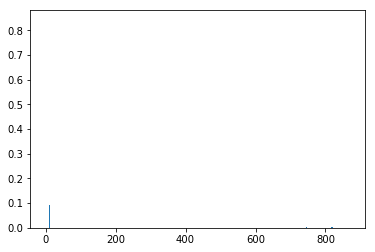

In [167]:
plt.bar([i for i in range(0,len(test[0]))], test[0])

### Generate a setlist

In [14]:
def generate_full_setlist(model, seed_setlist, n_songs):
    "takes in a length 100 np array of previous songs and generates full next setlist"
    
    setlist = []
    
    for _ in range(n_songs):
        # truncate sequences
        seq = pad_sequences([seed_setlist], maxlen=150, truncating='pre')[0]
        # predict next song
        next_song = model.predict_classes(np.array([seq])).item()
        # un-encode the song
        next_song_clean = idx_to_song[next_song]
        # append to generated list
        setlist.append(next_song_clean)
        # update seed_setlist to re-run for the next song
        seed_setlist = np.append(seed_setlist, next_song)
        
    return setlist

In [15]:
generate_full_setlist(model, test_seq, 25)

['Also Sprach Zarathustra',
 'David Bowie',
 'The Horse',
 'Silent in the Morning',
 'Reba',
 'You Enjoy Myself',
 'Hold Your Head Up',
 "Cracklin' Rosie",
 'Hold Your Head Up',
 'Harry Hood',
 '<ENCORE>',
 'Bold As Love',
 '<SET1>',
 'Runaway Jim',
 'Foam',
 'Bouncing Around the Room',
 'Split Open and Melt',
 'If I Could',
 'Scent of a Mule',
 'Stash',
 'The Squirming Coil',
 '<SET2>',
 'Also Sprach Zarathustra',
 'David Bowie',
 'The Horse']

In [47]:
def generate_full_setlist2(model, seed_setlist):
    '''
    Generate the remainder of a setlist given the previous 150 songs.
    
    Args:
        model (.hdf5) - a Phish prediction tensorflow model
        seed_setlist (ndarray) - encoded array of shape (150,)
    
    Returns:
        setlist (list) - generated sequence of encoded songs to complete the show
    
    '''
    
    setlist = []
    setlist_start = False
    pred_count = 0
    
    # generate remainder of setlist
    while setlist_start == False:
        # truncate sequences
        seq = pad_sequences([seed_setlist], maxlen=150, truncating='pre')[0]
        # predict next song
        next_song = model.predict_classes(np.array([seq])).item()
        # increment prediction counter
        pred_count += 1
        # check if a new setlist start is predicted (and its not the first song)
        if next_song == 8 and pred_count > 1:
            setlist_start = True
        else:
            # append to generated list
            setlist.append(next_song)
            # update seed_setlist to re-run for the next song
            seed_setlist = np.append(seed_setlist, next_song)
            
            
    return setlist

In [18]:
[idx_to_song[idx] for idx in generate_full_setlist2(model, test_seq)]

['Also Sprach Zarathustra',
 'David Bowie',
 'The Horse',
 'Silent in the Morning',
 'Reba',
 'You Enjoy Myself',
 'Hold Your Head Up',
 "Cracklin' Rosie",
 'Hold Your Head Up',
 'Harry Hood',
 '<ENCORE>',
 'Bold As Love']

### Generate Sankey Diagram JSON Data

In [58]:
import requests

In [185]:
# load model, latest sequence of 150, and mapping

model = load_model('../models/mvp-setlist-modeling/model.nn_arch_2-150-seqlen-100-lstmunits-0.5-b_dropout-0.5-a_dropout.hdf5')
test_seq = src.util.load_pickle_object('../data/processed/mvp-setlist-modeling/seqlen-150/final_seq_150.pkl')
idx_to_song = src.util.load_pickle_object('../data/processed/mvp-setlist-modeling/seqlen-150/idx_to_song.pkl')

In [186]:
model.predict_classes(np.array([test_seq])).item()

8

In [192]:
str(test_seq)

'[7, 96, 624, 8, 108, 83, 785, 745, 1, 135, 152, 855, 850, 516, 850, 9, 119, 786, 171, 786, 493, 29, 232, 7, 615, 787, 8, 30, 396, 30, 451, 264, 817, 158, 84, 75, 492, 779, 817, 779, 464, 9, 149, 218, 528, 399, 801, 647, 7, 256, 843, 569, 124, 8, 731, 666, 3, 585, 386, 659, 126, 822, 529, 810, 44, 576, 9, 196, 222, 604, 790, 292, 517, 292, 10, 443, 45, 591, 619, 589, 401, 561, 674, 7, 727, 129, 8, 649, 790, 247, 833, 218, 814, 556, 256, 585, 9, 637, 642, 319, 171, 29, 57, 746, 7, 810, 92, 8, 861, 785, 1, 492, 210, 779, 607, 589, 9, 602, 443, 624, 533, 586, 807, 7, 464, 8, 708, 538, 83, 174, 465, 181, 659, 126, 9, 232, 451, 817, 255, 786, 119, 259, 591, 7, 619, 431, 382, 67, 627, 787]'

In [188]:
idx_to_song[150]

'Cool It Down'

In [189]:
test_gen = generate_full_setlist2(model,test_seq)
test_gen

[8,
 247,
 731,
 554,
 3,
 657,
 386,
 779,
 724,
 57,
 9,
 196,
 255,
 790,
 399,
 292,
 7,
 419]

In [190]:
[idx_to_song[idx] for idx in test_gen]

['<SET1>',
 'Free',
 'The Moma Dance',
 'Rift',
 '555',
 'Stash',
 'Lawn Boy',
 'Tube',
 'The Line',
 'Bathtub Gin',
 '<SET2>',
 'Down with Disease',
 'Fuego',
 'Twist',
 'Light',
 'Harry Hood',
 '<ENCORE>',
 'Loving Cup']

#### Request predictions from model API

In [194]:
url = 'http://127.0.0.1:5000/next-song-proba'
headers = {'Content-type': 'application/json'}
#data = '45'
data = '[576, 9, 181, 57, 481, 15, 118, 325, 727, 451, 320, 817, 699, 272, 7, 148, 274, 8, 729, 46, 118, 855, 96, 143, 239, 745, 533, 194, 576, 9, 545, 733, 15, 707, 186, 624, 305, 861, 384, 148, 67, 7, 827, 8, 148, 733, 674, 729, 46, 545, 384, 451, 320, 817, 746, 727, 533, 9, 120, 571, 481, 96, 178, 686, 745, 855, 647, 291, 624, 15, 167, 7, 691, 8, 272, 213, 178, 96, 481, 551, 181, 194, 727, 576, 9, 380, 92, 733, 15, 241, 861, 7, 274, 8, 533, 855, 226, 807, 786, 792, 733, 674, 686, 577, 861, 274, 9, 256, 451, 320, 817, 369, 727, 647, 148, 384, 554, 124, 305, 347, 7, 120, 675, 827, 8, 7, 167, 8, 272, 861, 807, 686, 533, 241, 551, 181, 120, 9, 451, 320, 817, 213, 792, 745, 727, 325, 274, 7, 148, 305]'
r = requests.post(url, headers=headers, data=str(test_seq))
r.json()

{'next_song': [7.743763096035305e-12,
  4.4097465433878824e-05,
  1.6216004233848835e-11,
  2.050824332400225e-05,
  2.227589925127456e-15,
  5.628672441332361e-13,
  0.006600643042474985,
  0.00025398514117114246,
  0.8384509682655334,
  0.0010084961540997028,
  2.3408598281093873e-05,
  0.09069370478391647,
  7.681593139352572e-09,
  0.00011125777382403612,
  4.617484421487461e-07,
  0.0003312857879791409,
  2.8382851624542127e-10,
  1.0412768564060926e-10,
  0.0001919954374898225,
  5.3669406836461334e-14,
  8.010119927348569e-07,
  3.85723581075581e-07,
  6.490777764156519e-07,
  3.028434843394337e-14,
  2.5363033647320208e-15,
  1.6719221040744336e-17,
  9.524852089271008e-07,
  1.9922475985367782e-05,
  5.143479772797099e-18,
  6.449264765251428e-05,
  5.176074046175927e-05,
  8.606940832247974e-18,
  2.542171932873316e-05,
  6.013518849545818e-11,
  1.8423280678803167e-08,
  4.5273333693085505e-12,
  1.8246120760123663e-12,
  4.843437283186258e-12,
  3.976413154305192e-08,
  1.2

In [201]:
r.json()['next_song']

[7.743763096035305e-12,
 4.4097465433878824e-05,
 1.6216004233848835e-11,
 2.050824332400225e-05,
 2.227589925127456e-15,
 5.628672441332361e-13,
 0.006600643042474985,
 0.00025398514117114246,
 0.8384509682655334,
 0.0010084961540997028,
 2.3408598281093873e-05,
 0.09069370478391647,
 7.681593139352572e-09,
 0.00011125777382403612,
 4.617484421487461e-07,
 0.0003312857879791409,
 2.8382851624542127e-10,
 1.0412768564060926e-10,
 0.0001919954374898225,
 5.3669406836461334e-14,
 8.010119927348569e-07,
 3.85723581075581e-07,
 6.490777764156519e-07,
 3.028434843394337e-14,
 2.5363033647320208e-15,
 1.6719221040744336e-17,
 9.524852089271008e-07,
 1.9922475985367782e-05,
 5.143479772797099e-18,
 6.449264765251428e-05,
 5.176074046175927e-05,
 8.606940832247974e-18,
 2.542171932873316e-05,
 6.013518849545818e-11,
 1.8423280678803167e-08,
 4.5273333693085505e-12,
 1.8246120760123663e-12,
 4.843437283186258e-12,
 3.976413154305192e-08,
 1.280001105108397e-10,
 3.395909152459353e-05,
 1.231025

In [206]:
np.argsort(r.json()['next_song'])[-3:][::-1]

array([  8,  11, 787])

In [207]:
np.argsort(r.json()['next_song'])

array([205, 197, 427, 162, 862, 678, 718, 804, 495, 762, 383, 515, 489,
       258, 844, 321, 450,  71, 742, 316, 115,  68,  74, 614, 374, 442,
       449, 476, 380,  82, 506, 500, 309,  51, 743, 653, 113, 716, 771,
       444, 685, 389, 342, 212,  69, 584, 555,  28,  80, 141, 833, 687,
        31, 326, 648, 660, 375, 828, 138, 388,  25,  50, 117, 490, 744,
       267, 839, 406, 358, 741, 273, 656, 341,  94, 217, 340, 504, 541,
       428, 204, 841, 275, 330, 377, 605, 611, 313, 404, 788, 592, 261,
       636, 651, 339, 343, 723, 863, 163, 348,  46, 613, 564, 125, 719,
       778, 168, 479, 385, 195, 642, 171, 402, 630, 696, 183, 122, 198,
       632,   4, 590, 502,  24, 392, 100, 705, 287, 417, 345, 695, 568,
       357, 229, 211, 353, 783,  86, 269, 488, 765, 191,  90, 845, 756,
       112, 302, 697, 799, 572, 600, 499, 360, 485,  62, 508, 216, 859,
       215, 249, 376, 853,  66, 753,  23, 513, 758, 676, 565, 546, 363,
       312, 277, 331, 296, 501,  19, 188, 184, 349, 578, 182, 66

In [ ]:
np.argsort()

In [85]:
!curl -X POST http://127.0.0.1:5000/generate-setlist -H 'Content-Type: application/json' -d '[576, 9, 181, 57, 481, 15, 118, 325, 727, 451, 320, 817, 699, 272, 7, 148, 274, 8, 729, 46, 118, 855, 96, 143, 239, 745, 533, 194, 576, 9, 545, 733, 15, 707, 186, 624, 305, 861, 384, 148, 67, 7, 827, 8, 148, 733, 674, 729, 46, 545, 384, 451, 320, 817, 746, 727, 533, 9, 120, 571, 481, 96, 178, 686, 745, 855, 647, 291, 624, 15, 167, 7, 691, 8, 272, 213, 178, 96, 481, 551, 181, 194, 727, 576, 9, 380, 92, 733, 15, 241, 861, 7, 274, 8, 533, 855, 226, 807, 786, 792, 733, 674, 686, 577, 861, 274, 9, 256, 451, 320, 817, 369, 727, 647, 148, 384, 554, 124, 305, 347, 7, 120, 675, 827, 8, 7, 167, 8, 272, 861, 807, 686, 533, 241, 551, 181, 120, 9, 451, 320, 817, 213, 792, 745, 727, 325, 274, 7, 148, 305]'

{"generated_sequence":["<SET1>","Golgi Apparatus","You Enjoy Myself","Ya Mar","You Enjoy Myself","Ya Mar","Mike's Song","I Am Hydrogen","Weekapaug Groove","<SET2>","Golgi Apparatus","Reba","Possum","The Lizards","Possum","<ENCORE>","Contact"],"input_sequence":["Run Like an Antelope","<SET2>","Divided Sky","Bathtub Gin","My Sweet One","AC/DC Bag","Caravan","I Didn't Know","The Lizards","Mike's Song","I Am Hydrogen","Weekapaug Groove","The Ballad of Curtis Loew","Golgi Apparatus","<ENCORE>","Contact","Good Times Bad Times","<SET1>","The Man Who Stepped Into Yesterday","Avenu Malkenu","Caravan","Ya Mar","Bouncing Around the Room","Colonel Forbin's Ascent","Fly Famous Mockingbird","The Sloth","Possum","Donna Lee","Run Like an Antelope","<SET2>","Reba","The Oh Kee Pa Ceremony","AC/DC Bag","The Curtain","Dog Log","Slave to the Traffic Light","Highway to Hell","You Enjoy Myself","La Grange","Contact","Big Black Furry Creature from Mars","<ENCORE>","Whipping Post","<SET1>","Contact","The Oh Ke

In [155]:
idx_to_song

{0: '1999',
 1: '46 Days',
 2: '50 Ways to Leave Your Lover',
 3: '555',
 4: '5:15',
 5: '99 Problems',
 6: '<ENCORE2>',
 7: '<ENCORE>',
 8: '<SET1>',
 9: '<SET2>',
 10: '<SET3>',
 11: '<SET4>',
 12: 'A Apolitical Blues',
 13: 'A Day in the Life',
 14: 'A Song I Heard the Ocean Sing',
 15: 'AC/DC Bag',
 16: 'Access Me',
 17: 'Acoustic Army',
 18: 'After Midnight',
 19: "Ain't Love Funny",
 20: 'Alaska',
 21: 'Albuquerque',
 22: 'All Along the Watchtower',
 23: 'All Blues',
 24: 'All Down the Line',
 25: 'All That You Dream',
 26: 'All Things Reconsidered',
 27: 'All of These Dreams',
 28: 'All the Pain Through the Years',
 29: 'Also Sprach Zarathustra',
 30: 'Alumni Blues',
 31: 'Alumni Blues Jam',
 32: 'Amazing Grace',
 33: 'Amazing Grace Jam',
 34: 'Ambient Jam',
 35: 'American Woman',
 36: 'Amidst the Peals of Laughter',
 37: 'Amoreena',
 38: 'Anarchy',
 39: 'Any Colour You Like',
 40: 'Anything But Me',
 41: 'Architect',
 42: 'Army of One',
 43: 'Art Jam',
 44: 'Ass Handed',
 45: '

#### Build json

In [202]:
test_seq

[7,
 96,
 624,
 8,
 108,
 83,
 785,
 745,
 1,
 135,
 152,
 855,
 850,
 516,
 850,
 9,
 119,
 786,
 171,
 786,
 493,
 29,
 232,
 7,
 615,
 787,
 8,
 30,
 396,
 30,
 451,
 264,
 817,
 158,
 84,
 75,
 492,
 779,
 817,
 779,
 464,
 9,
 149,
 218,
 528,
 399,
 801,
 647,
 7,
 256,
 843,
 569,
 124,
 8,
 731,
 666,
 3,
 585,
 386,
 659,
 126,
 822,
 529,
 810,
 44,
 576,
 9,
 196,
 222,
 604,
 790,
 292,
 517,
 292,
 10,
 443,
 45,
 591,
 619,
 589,
 401,
 561,
 674,
 7,
 727,
 129,
 8,
 649,
 790,
 247,
 833,
 218,
 814,
 556,
 256,
 585,
 9,
 637,
 642,
 319,
 171,
 29,
 57,
 746,
 7,
 810,
 92,
 8,
 861,
 785,
 1,
 492,
 210,
 779,
 607,
 589,
 9,
 602,
 443,
 624,
 533,
 586,
 807,
 7,
 464,
 8,
 708,
 538,
 83,
 174,
 465,
 181,
 659,
 126,
 9,
 232,
 451,
 817,
 255,
 786,
 119,
 259,
 591,
 7,
 619,
 431,
 382,
 67,
 627,
 787]

In [510]:
import numpy as np
import pandas as pd

class SankeyData():
    
    def __init__(self, input_seq, n_preds=5):
        
        # data validation
        if not isinstance(input_seq, list):
            raise TypeError('Input sequence must be a list.')
        if len(input_seq) != 150:
            raise AttributeError('Input sequence must be of length 150.')
                                 
        # define attributes
        self.url = 'http://127.0.0.1:5000/'
        self.input_seq = input_seq
        self.n_preds = n_preds
        self.levels = 3
        
        
    def format_links_data(self):
        
        if not hasattr(self, 'all_preds'):
            self.get_all_preds()
        if not hasattr(self, 'L1_data'):
            self.build_L1_data()
        if not hasattr(self, 'node_dataframe'):
            self.format_nodes_data()
            
            
        # create L1 --> L2 links
        L2_links = []

        for tup in self.all_preds['L2']:
            
            source_idx = self.node_dataframe[self.node_dataframe['level']==1].index.item()
            target_idx = self.node_dataframe[(self.node_dataframe['level']==2) & (self.node_dataframe['enc']==tup[0])].index.item()
            value = tup[2]

            link = {'source':source_idx,'target':target_idx,'value':value}

            L2_links.append(link)
    
        # create L2 -- L3 links

        L3_links = []

        for i, list_of_tups in self.all_preds['L3'].items():
            for tup in list_of_tups:
                source_enc = self.all_preds['L2'][i][0]
                source_idx = self.node_dataframe[(self.node_dataframe['level']==2) & (self.node_dataframe['enc']==source_enc)].index.item()
                target_idx = self.node_dataframe[(self.node_dataframe['level']==3) & (self.node_dataframe['enc']==tup[0])].index.item()
                value = tup[2]

                link = {'source':source_idx,'target':target_idx,'value':value}

                L3_links.append(link)
        
        links_data = L2_links + L3_links
        self.links_data = links_data
        
        return links_data
        
        
    def format_nodes_data(self):
        
        if not hasattr(self, 'all_preds'):
            self.get_all_preds()
        if not hasattr(self, 'L1_data'):
            self.build_L1_data()
            
        # build L1 node data
        L1_tup = self.L1_data['L1']
        L1_list = []
        L1_list.append({'enc':L1_tup[0],'name':L1_tup[1],'level':1})
        
        
        # build L2 node data
        clean_lol2 = [{'enc':tup[0],'name':tup[1],'level':2} for tup in self.all_preds['L2']]
        clean_lol2_dedup = [i for n, i in enumerate(clean_lol2) if i not in clean_lol2[n+1:]]
        
        L2_list = clean_lol2_dedup
        
        # build L3 node data
        lol3 = [[{'enc':tup[0],'name':tup[1],'level':3} for tup in self.all_preds['L3'][i]] for i in self.all_preds['L3']]
        clean_lol3 = [val for sublist in lol3 for val in sublist]
        clean_lol3_dedup = [i for n, i in enumerate(clean_lol3) if i not in clean_lol3[n+1:]]
        
        L3_list = clean_lol3_dedup
        
        # append all node lists together
        node_data = L1_list + L2_list + L3_list
        
        self.node_data = node_data
        self.node_dataframe = pd.DataFrame(node_data)
        
        return node_data
        
        
    def get_all_preds(self):
        
        all_preds = {}
        
        for level in range(2, self.levels+1):
            
            if level == 2:
                seq = self.input_seq
                preds = self.get_strongest_preds(seq)
                all_preds['L2'] = preds
            
            if level == 3:
                L3_preds = {}
                
                for i, pred in enumerate(all_preds['L2']):
                    # get new data sequence
                    seq = self.input_seq[:-1]
                    seq.append(pred[0])
                    # get new prediction from new sequence
                    preds = self.get_strongest_preds(seq)
                    # append to L3 list
                    L3_preds[i] = preds
                
                all_preds['L3'] = L3_preds
                
        self.all_preds = all_preds
                    
        return all_preds
    
    def build_L1_data(self):
        L1_data = {}
        idx = self.input_seq[-1]
        song = self.decode_songs(str(idx))['decoded_songs']
        
        L1_data['L1'] = (idx,song)
        
        self.L1_data = L1_data
        
        return L1_data
    
    
    def get_strongest_preds(self, seq):
        '''
        Get the most probable next song predictions

        Args:
            seq (list) - a list of 150 encoded songs

        Returns:
            preds (list) - a list of tuples (song encoding, probability) in decending order

        '''
        # define request params
        endpoint = 'next-song-proba'
        url = self.url + endpoint
        headers = {'Content-type': 'application/json'}
        data = str(seq)

        # extract the data from json
        req = requests.post(url, headers=headers, data=data)
        req_clean = req.json()['next_song_proba']

        # retrieve top n_preds song encoding (index), song name, and probability
        preds_idx = np.argsort(req_clean)[-self.n_preds:][::-1]
        preds_song = [self.decode_songs(str(idx))['decoded_songs'] for idx in preds_idx]
        preds_proba = np.sort(req_clean)[-self.n_preds:][::-1]

        preds = zip(preds_idx, preds_song, preds_proba)

        return list(preds)

    def decode_songs(self, songs):
        '''
        Get the english representation of an encoded song from the /decode-songs API endpoint

        Args:
            songs (str) - either a single integer or list of integers represented as string
                        Ex.'5' or '[5, 43]'

        Returns:
            req_clean (dict) - dictionary containing decoded songs

        '''
        # define request params
        endpoint = 'decode-songs'
        url = self.url + endpoint
        headers = {'Content-type': 'application/json'}
        data = songs

        # extract the data from json
        req = requests.post(url, headers=headers, data=data)
        req_clean = req.json()

        return req_clean

In [511]:
sankey = SankeyData(input_seq=test_seq)

In [513]:
sankey.links_data

[{'source': 0, 'target': 1, 'value': 0.8384509682655334},
 {'source': 0, 'target': 2, 'value': 0.09069370478391647},
 {'source': 0, 'target': 3, 'value': 0.015020121820271015},
 {'source': 0, 'target': 4, 'value': 0.006600643042474985},
 {'source': 0, 'target': 5, 'value': 0.0028397259302437305},
 {'source': 1, 'target': 6, 'value': 0.029856838285923004},
 {'source': 1, 'target': 7, 'value': 0.02902103401720524},
 {'source': 1, 'target': 8, 'value': 0.027221089228987694},
 {'source': 1, 'target': 9, 'value': 0.026049437001347542},
 {'source': 1, 'target': 10, 'value': 0.025447988882660866},
 {'source': 2, 'target': 19, 'value': 0.06856036186218262},
 {'source': 2, 'target': 17, 'value': 0.0430850051343441},
 {'source': 2, 'target': 15, 'value': 0.03963278979063034},
 {'source': 2, 'target': 20, 'value': 0.02395017072558403},
 {'source': 2, 'target': 11, 'value': 0.021243685856461525},
 {'source': 3, 'target': 17, 'value': 0.8384509682655334},
 {'source': 3, 'target': 18, 'value': 0.090

In [515]:
sankey.node_dataframe

,enc,level,name
0,787,1,Tweezer Reprise
1,8,2,<SET1>
2,11,2,<SET4>
3,787,2,Tweezer Reprise
4,6,2,<ENCORE2>
5,569,2,Rocky Top
6,379,3,Kill Devil Falls
7,747,3,The Star Spangled Banner
8,15,3,AC/DC Bag
9,126,3,Chalk Dust Torture


In [467]:
t = sankey.get_strongest_preds(test_seq)
t

[(8, '<SET1>', 0.8384509682655334),
 (11, '<SET4>', 0.09069370478391647),
 (787, 'Tweezer Reprise', 0.015020121820271015),
 (6, '<ENCORE2>', 0.006600643042474985),
 (569, 'Rocky Top', 0.0028397259302437305)]

In [468]:
sankey.format_nodes_data()

[{'enc': 787, 'name': 'Tweezer Reprise', 'level': 1},
 {'enc': 8, 'name': '<SET1>', 'level': 2},
 {'enc': 11, 'name': '<SET4>', 'level': 2},
 {'enc': 787, 'name': 'Tweezer Reprise', 'level': 2},
 {'enc': 6, 'name': '<ENCORE2>', 'level': 2},
 {'enc': 569, 'name': 'Rocky Top', 'level': 2},
 {'enc': 379, 'name': 'Kill Devil Falls', 'level': 3},
 {'enc': 747, 'name': 'The Star Spangled Banner', 'level': 3},
 {'enc': 15, 'name': 'AC/DC Bag', 'level': 3},
 {'enc': 126, 'name': 'Chalk Dust Torture', 'level': 3},
 {'enc': 431, 'name': 'Martian Monster', 'level': 3},
 {'enc': 867, 'name': 'Your Pet Cat', 'level': 3},
 {'enc': 6, 'name': '<ENCORE2>', 'level': 3},
 {'enc': 569, 'name': 'Rocky Top', 'level': 3},
 {'enc': 387, 'name': 'Lawn Boy Reprise', 'level': 3},
 {'enc': 795, 'name': 'United We Stand', 'level': 3},
 {'enc': 148, 'name': 'Contact', 'level': 3},
 {'enc': 8, 'name': '<SET1>', 'level': 3},
 {'enc': 11, 'name': '<SET4>', 'level': 3},
 {'enc': 512, 'name': 'Once in a Lifetime', 'lev

In [469]:
sankey.all_preds

{'L2': [(8, '<SET1>', 0.8384509682655334),
  (11, '<SET4>', 0.09069370478391647),
  (787, 'Tweezer Reprise', 0.015020121820271015),
  (6, '<ENCORE2>', 0.006600643042474985),
  (569, 'Rocky Top', 0.0028397259302437305)],
 'L3': {0: [(379, 'Kill Devil Falls', 0.029856838285923004),
   (747, 'The Star Spangled Banner', 0.02902103401720524),
   (15, 'AC/DC Bag', 0.027221089228987694),
   (126, 'Chalk Dust Torture', 0.026049437001347542),
   (431, 'Martian Monster', 0.025447988882660866)],
  1: [(512, 'Once in a Lifetime', 0.06856036186218262),
   (8, '<SET1>', 0.0430850051343441),
   (795, 'United We Stand', 0.03963278979063034),
   (787, 'Tweezer Reprise', 0.02395017072558403),
   (867, 'Your Pet Cat', 0.021243685856461525)],
  2: [(8, '<SET1>', 0.8384509682655334),
   (11, '<SET4>', 0.09069370478391647),
   (787, 'Tweezer Reprise', 0.015020121820271015),
   (6, '<ENCORE2>', 0.006600643042474985),
   (569, 'Rocky Top', 0.0028397259302437305)],
  3: [(387, 'Lawn Boy Reprise', 0.03252549469

In [491]:
sankey.all_preds['L3']

{0: [(379, 'Kill Devil Falls', 0.029856838285923004),
  (747, 'The Star Spangled Banner', 0.02902103401720524),
  (15, 'AC/DC Bag', 0.027221089228987694),
  (126, 'Chalk Dust Torture', 0.026049437001347542),
  (431, 'Martian Monster', 0.025447988882660866)],
 1: [(512, 'Once in a Lifetime', 0.06856036186218262),
  (8, '<SET1>', 0.0430850051343441),
  (795, 'United We Stand', 0.03963278979063034),
  (787, 'Tweezer Reprise', 0.02395017072558403),
  (867, 'Your Pet Cat', 0.021243685856461525)],
 2: [(8, '<SET1>', 0.8384509682655334),
  (11, '<SET4>', 0.09069370478391647),
  (787, 'Tweezer Reprise', 0.015020121820271015),
  (6, '<ENCORE2>', 0.006600643042474985),
  (569, 'Rocky Top', 0.0028397259302437305)],
 3: [(387, 'Lawn Boy Reprise', 0.03252549469470978),
  (795, 'United We Stand', 0.031078482046723366),
  (8, '<SET1>', 0.026742499321699142),
  (787, 'Tweezer Reprise', 0.017223509028553963),
  (148, 'Contact', 0.015719424933195114)],
 4: [(8, '<SET1>', 0.5826576948165894),
  (11, '<SE

In [492]:
sankey.all_preds['L3']

{0: [(379, 'Kill Devil Falls', 0.029856838285923004),
  (747, 'The Star Spangled Banner', 0.02902103401720524),
  (15, 'AC/DC Bag', 0.027221089228987694),
  (126, 'Chalk Dust Torture', 0.026049437001347542),
  (431, 'Martian Monster', 0.025447988882660866)],
 1: [(512, 'Once in a Lifetime', 0.06856036186218262),
  (8, '<SET1>', 0.0430850051343441),
  (795, 'United We Stand', 0.03963278979063034),
  (787, 'Tweezer Reprise', 0.02395017072558403),
  (867, 'Your Pet Cat', 0.021243685856461525)],
 2: [(8, '<SET1>', 0.8384509682655334),
  (11, '<SET4>', 0.09069370478391647),
  (787, 'Tweezer Reprise', 0.015020121820271015),
  (6, '<ENCORE2>', 0.006600643042474985),
  (569, 'Rocky Top', 0.0028397259302437305)],
 3: [(387, 'Lawn Boy Reprise', 0.03252549469470978),
  (795, 'United We Stand', 0.031078482046723366),
  (8, '<SET1>', 0.026742499321699142),
  (787, 'Tweezer Reprise', 0.017223509028553963),
  (148, 'Contact', 0.015719424933195114)],
 4: [(8, '<SET1>', 0.5826576948165894),
  (11, '<SE

In [504]:
# create L2 -- L3 links

L3_links = []

for i, list_of_tups in sankey.all_preds['L3'].items():
    for tup in list_of_tups:
        source_enc = sankey.all_preds['L2'][i][0]
        source_idx = sankey.node_dataframe[(sankey.node_dataframe['level']==2) & (sankey.node_dataframe['enc']==source_enc)].index.item()
        target_idx = sankey.node_dataframe[(sankey.node_dataframe['level']==3) & (sankey.node_dataframe['enc']==tup[0])].index.item()
        value = tup[2]
        
        link = {'source':source_idx,'target':target_idx,'value':value}
        
        L3_links.append(link)

In [507]:
L3_links

[{'source': 1, 'target': 6, 'value': 0.029856838285923004},
 {'source': 1, 'target': 7, 'value': 0.02902103401720524},
 {'source': 1, 'target': 8, 'value': 0.027221089228987694},
 {'source': 1, 'target': 9, 'value': 0.026049437001347542},
 {'source': 1, 'target': 10, 'value': 0.025447988882660866},
 {'source': 2, 'target': 19, 'value': 0.06856036186218262},
 {'source': 2, 'target': 17, 'value': 0.0430850051343441},
 {'source': 2, 'target': 15, 'value': 0.03963278979063034},
 {'source': 2, 'target': 20, 'value': 0.02395017072558403},
 {'source': 2, 'target': 11, 'value': 0.021243685856461525},
 {'source': 3, 'target': 17, 'value': 0.8384509682655334},
 {'source': 3, 'target': 18, 'value': 0.09069370478391647},
 {'source': 3, 'target': 20, 'value': 0.015020121820271015},
 {'source': 3, 'target': 12, 'value': 0.006600643042474985},
 {'source': 3, 'target': 13, 'value': 0.0028397259302437305},
 {'source': 4, 'target': 14, 'value': 0.03252549469470978},
 {'source': 4, 'target': 15, 'value':

In [509]:
sankey.node_dataframe

,enc,level,name
0,787,1,Tweezer Reprise
1,8,2,<SET1>
2,11,2,<SET4>
3,787,2,Tweezer Reprise
4,6,2,<ENCORE2>
5,569,2,Rocky Top
6,379,3,Kill Devil Falls
7,747,3,The Star Spangled Banner
8,15,3,AC/DC Bag
9,126,3,Chalk Dust Torture


In [500]:
sankey.all_preds['L2']

[(8, '<SET1>', 0.8384509682655334),
 (11, '<SET4>', 0.09069370478391647),
 (787, 'Tweezer Reprise', 0.015020121820271015),
 (6, '<ENCORE2>', 0.006600643042474985),
 (569, 'Rocky Top', 0.0028397259302437305)]

In [499]:
sankey.node_dataframe

,enc,level,name
0,787,1,Tweezer Reprise
1,8,2,<SET1>
2,11,2,<SET4>
3,787,2,Tweezer Reprise
4,6,2,<ENCORE2>
5,569,2,Rocky Top
6,379,3,Kill Devil Falls
7,747,3,The Star Spangled Banner
8,15,3,AC/DC Bag
9,126,3,Chalk Dust Torture


In [489]:
# create L1 --> L2 links

L2_links = []

for tup in sankey.all_preds['L2']:
    source_idx = sankey.node_dataframe[sankey.node_dataframe['level']==1].index.item()
    target_idx = sankey.node_dataframe[(sankey.node_dataframe['level']==2) & (sankey.node_dataframe['enc']==tup[0])].index.item()
    value = tup[2]
    
    link = {'source':source_idx,'target':target_idx,'value':value}
    
    L2_links.append(link)
    
    

In [490]:
L2_links

[{'source': 0, 'target': 1, 'value': 0.8384509682655334},
 {'source': 0, 'target': 2, 'value': 0.09069370478391647},
 {'source': 0, 'target': 3, 'value': 0.015020121820271015},
 {'source': 0, 'target': 4, 'value': 0.006600643042474985},
 {'source': 0, 'target': 5, 'value': 0.0028397259302437305}]

In [488]:
sankey.node_dataframe[(sankey.node_dataframe['level']==2) & (sankey.node_dataframe['enc']==569)]

,enc,level,name
5,569,2,Rocky Top


In [470]:
sankey.node_dataframe

,enc,level,name
0,787,1,Tweezer Reprise
1,8,2,<SET1>
2,11,2,<SET4>
3,787,2,Tweezer Reprise
4,6,2,<ENCORE2>
5,569,2,Rocky Top
6,379,3,Kill Devil Falls
7,747,3,The Star Spangled Banner
8,15,3,AC/DC Bag
9,126,3,Chalk Dust Torture


In [427]:
sankey.L1_data

{'L1': (787, 'Tweezer Reprise')}

In [358]:
sankey.get_all_preds()

{'L2': [(8, '<SET1>', 0.8384509682655334),
  (11, '<SET4>', 0.09069370478391647),
  (787, 'Tweezer Reprise', 0.015020121820271015),
  (6, '<ENCORE2>', 0.006600643042474985),
  (569, 'Rocky Top', 0.0028397259302437305)],
 'L3': {0: [(379, 'Kill Devil Falls', 0.029856838285923004),
   (747, 'The Star Spangled Banner', 0.02902103401720524),
   (15, 'AC/DC Bag', 0.027221089228987694),
   (126, 'Chalk Dust Torture', 0.026049437001347542),
   (431, 'Martian Monster', 0.025447988882660866)],
  1: [(512, 'Once in a Lifetime', 0.06856036186218262),
   (8, '<SET1>', 0.0430850051343441),
   (795, 'United We Stand', 0.03963278979063034),
   (787, 'Tweezer Reprise', 0.02395017072558403),
   (867, 'Your Pet Cat', 0.021243685856461525)],
  2: [(8, '<SET1>', 0.8384509682655334),
   (11, '<SET4>', 0.09069370478391647),
   (787, 'Tweezer Reprise', 0.015020121820271015),
   (6, '<ENCORE2>', 0.006600643042474985),
   (569, 'Rocky Top', 0.0028397259302437305)],
  3: [(387, 'Lawn Boy Reprise', 0.03252549469

In [359]:
data = sankey.get_all_preds()

In [363]:
data['L3']

{0: [(379, 'Kill Devil Falls', 0.029856838285923004),
  (747, 'The Star Spangled Banner', 0.02902103401720524),
  (15, 'AC/DC Bag', 0.027221089228987694),
  (126, 'Chalk Dust Torture', 0.026049437001347542),
  (431, 'Martian Monster', 0.025447988882660866)],
 1: [(512, 'Once in a Lifetime', 0.06856036186218262),
  (8, '<SET1>', 0.0430850051343441),
  (795, 'United We Stand', 0.03963278979063034),
  (787, 'Tweezer Reprise', 0.02395017072558403),
  (867, 'Your Pet Cat', 0.021243685856461525)],
 2: [(8, '<SET1>', 0.8384509682655334),
  (11, '<SET4>', 0.09069370478391647),
  (787, 'Tweezer Reprise', 0.015020121820271015),
  (6, '<ENCORE2>', 0.006600643042474985),
  (569, 'Rocky Top', 0.0028397259302437305)],
 3: [(387, 'Lawn Boy Reprise', 0.03252549469470978),
  (795, 'United We Stand', 0.031078482046723366),
  (8, '<SET1>', 0.026742499321699142),
  (787, 'Tweezer Reprise', 0.017223509028553963),
  (148, 'Contact', 0.015719424933195114)],
 4: [(8, '<SET1>', 0.5826576948165894),
  (11, '<SE

In [424]:
clean_lol2 = [{'enc':tup[0],'name':tup[1],'level':2} for tup in data['L2']]
clean_lol2

[{'enc': 8, 'name': '<SET1>', 'level': 2},
 {'enc': 11, 'name': '<SET4>', 'level': 2},
 {'enc': 787, 'name': 'Tweezer Reprise', 'level': 2},
 {'enc': 6, 'name': '<ENCORE2>', 'level': 2},
 {'enc': 569, 'name': 'Rocky Top', 'level': 2}]

In [425]:
clean_lol2_dedup = [i for n, i in enumerate(clean_lol2) if i not in clean_lol2[n+1:]]
clean_lol2_dedup

[{'enc': 8, 'name': '<SET1>', 'level': 2},
 {'enc': 11, 'name': '<SET4>', 'level': 2},
 {'enc': 787, 'name': 'Tweezer Reprise', 'level': 2},
 {'enc': 6, 'name': '<ENCORE2>', 'level': 2},
 {'enc': 569, 'name': 'Rocky Top', 'level': 2}]

In [377]:
[[{'enc':tup[0],'name':tup[1],'level':3} for tup in node.iteritems()] for node in data['L3']]

AttributeError: 'int' object has no attribute 'iteritems'

In [394]:
[node for node in data['L3']]

[0, 1, 2, 3, 4]

In [400]:
data['L3']

{0: [(379, 'Kill Devil Falls', 0.029856838285923004),
  (747, 'The Star Spangled Banner', 0.02902103401720524),
  (15, 'AC/DC Bag', 0.027221089228987694),
  (126, 'Chalk Dust Torture', 0.026049437001347542),
  (431, 'Martian Monster', 0.025447988882660866)],
 1: [(512, 'Once in a Lifetime', 0.06856036186218262),
  (8, '<SET1>', 0.0430850051343441),
  (795, 'United We Stand', 0.03963278979063034),
  (787, 'Tweezer Reprise', 0.02395017072558403),
  (867, 'Your Pet Cat', 0.021243685856461525)],
 2: [(8, '<SET1>', 0.8384509682655334),
  (11, '<SET4>', 0.09069370478391647),
  (787, 'Tweezer Reprise', 0.015020121820271015),
  (6, '<ENCORE2>', 0.006600643042474985),
  (569, 'Rocky Top', 0.0028397259302437305)],
 3: [(387, 'Lawn Boy Reprise', 0.03252549469470978),
  (795, 'United We Stand', 0.031078482046723366),
  (8, '<SET1>', 0.026742499321699142),
  (787, 'Tweezer Reprise', 0.017223509028553963),
  (148, 'Contact', 0.015719424933195114)],
 4: [(8, '<SET1>', 0.5826576948165894),
  (11, '<SE

In [404]:
[{'enc':tup[0],'name':tup[1],'level':3} for tup in data['L3'][0]]

[{'enc': 379, 'name': 'Kill Devil Falls', 'level': 3},
 {'enc': 747, 'name': 'The Star Spangled Banner', 'level': 3},
 {'enc': 15, 'name': 'AC/DC Bag', 'level': 3},
 {'enc': 126, 'name': 'Chalk Dust Torture', 'level': 3},
 {'enc': 431, 'name': 'Martian Monster', 'level': 3}]

In [408]:
[item for item in data['L3']]

[0, 1, 2, 3, 4]

In [413]:
[[{'enc':tup[0],'name':tup[1],'level':3} for tup in data['L3'][i]] for i in data['L3']]

[[{'enc': 379, 'name': 'Kill Devil Falls', 'level': 3},
  {'enc': 747, 'name': 'The Star Spangled Banner', 'level': 3},
  {'enc': 15, 'name': 'AC/DC Bag', 'level': 3},
  {'enc': 126, 'name': 'Chalk Dust Torture', 'level': 3},
  {'enc': 431, 'name': 'Martian Monster', 'level': 3}],
 [{'enc': 512, 'name': 'Once in a Lifetime', 'level': 3},
  {'enc': 8, 'name': '<SET1>', 'level': 3},
  {'enc': 795, 'name': 'United We Stand', 'level': 3},
  {'enc': 787, 'name': 'Tweezer Reprise', 'level': 3},
  {'enc': 867, 'name': 'Your Pet Cat', 'level': 3}],
 [{'enc': 8, 'name': '<SET1>', 'level': 3},
  {'enc': 11, 'name': '<SET4>', 'level': 3},
  {'enc': 787, 'name': 'Tweezer Reprise', 'level': 3},
  {'enc': 6, 'name': '<ENCORE2>', 'level': 3},
  {'enc': 569, 'name': 'Rocky Top', 'level': 3}],
 [{'enc': 387, 'name': 'Lawn Boy Reprise', 'level': 3},
  {'enc': 795, 'name': 'United We Stand', 'level': 3},
  {'enc': 8, 'name': '<SET1>', 'level': 3},
  {'enc': 787, 'name': 'Tweezer Reprise', 'level': 3},
  

In [417]:
lol = [[{'enc':tup[0],'name':tup[1],'level':3} for tup in data['L3'][i]] for i in data['L3']]
lol

[[{'enc': 379, 'name': 'Kill Devil Falls', 'level': 3},
  {'enc': 747, 'name': 'The Star Spangled Banner', 'level': 3},
  {'enc': 15, 'name': 'AC/DC Bag', 'level': 3},
  {'enc': 126, 'name': 'Chalk Dust Torture', 'level': 3},
  {'enc': 431, 'name': 'Martian Monster', 'level': 3}],
 [{'enc': 512, 'name': 'Once in a Lifetime', 'level': 3},
  {'enc': 8, 'name': '<SET1>', 'level': 3},
  {'enc': 795, 'name': 'United We Stand', 'level': 3},
  {'enc': 787, 'name': 'Tweezer Reprise', 'level': 3},
  {'enc': 867, 'name': 'Your Pet Cat', 'level': 3}],
 [{'enc': 8, 'name': '<SET1>', 'level': 3},
  {'enc': 11, 'name': '<SET4>', 'level': 3},
  {'enc': 787, 'name': 'Tweezer Reprise', 'level': 3},
  {'enc': 6, 'name': '<ENCORE2>', 'level': 3},
  {'enc': 569, 'name': 'Rocky Top', 'level': 3}],
 [{'enc': 387, 'name': 'Lawn Boy Reprise', 'level': 3},
  {'enc': 795, 'name': 'United We Stand', 'level': 3},
  {'enc': 8, 'name': '<SET1>', 'level': 3},
  {'enc': 787, 'name': 'Tweezer Reprise', 'level': 3},
  

In [422]:
clean_lol = [val for sublist in lol for val in sublist]
clean_lol

[{'enc': 379, 'name': 'Kill Devil Falls', 'level': 3},
 {'enc': 747, 'name': 'The Star Spangled Banner', 'level': 3},
 {'enc': 15, 'name': 'AC/DC Bag', 'level': 3},
 {'enc': 126, 'name': 'Chalk Dust Torture', 'level': 3},
 {'enc': 431, 'name': 'Martian Monster', 'level': 3},
 {'enc': 512, 'name': 'Once in a Lifetime', 'level': 3},
 {'enc': 8, 'name': '<SET1>', 'level': 3},
 {'enc': 795, 'name': 'United We Stand', 'level': 3},
 {'enc': 787, 'name': 'Tweezer Reprise', 'level': 3},
 {'enc': 867, 'name': 'Your Pet Cat', 'level': 3},
 {'enc': 8, 'name': '<SET1>', 'level': 3},
 {'enc': 11, 'name': '<SET4>', 'level': 3},
 {'enc': 787, 'name': 'Tweezer Reprise', 'level': 3},
 {'enc': 6, 'name': '<ENCORE2>', 'level': 3},
 {'enc': 569, 'name': 'Rocky Top', 'level': 3},
 {'enc': 387, 'name': 'Lawn Boy Reprise', 'level': 3},
 {'enc': 795, 'name': 'United We Stand', 'level': 3},
 {'enc': 8, 'name': '<SET1>', 'level': 3},
 {'enc': 787, 'name': 'Tweezer Reprise', 'level': 3},
 {'enc': 148, 'name': 'C

In [423]:
clean_lol_dedup = [i for n, i in enumerate(clean_lol) if i not in clean_lol[n+1:]]

[{'enc': 379, 'name': 'Kill Devil Falls', 'level': 3},
 {'enc': 747, 'name': 'The Star Spangled Banner', 'level': 3},
 {'enc': 15, 'name': 'AC/DC Bag', 'level': 3},
 {'enc': 126, 'name': 'Chalk Dust Torture', 'level': 3},
 {'enc': 431, 'name': 'Martian Monster', 'level': 3},
 {'enc': 867, 'name': 'Your Pet Cat', 'level': 3},
 {'enc': 6, 'name': '<ENCORE2>', 'level': 3},
 {'enc': 569, 'name': 'Rocky Top', 'level': 3},
 {'enc': 387, 'name': 'Lawn Boy Reprise', 'level': 3},
 {'enc': 795, 'name': 'United We Stand', 'level': 3},
 {'enc': 148, 'name': 'Contact', 'level': 3},
 {'enc': 8, 'name': '<SET1>', 'level': 3},
 {'enc': 11, 'name': '<SET4>', 'level': 3},
 {'enc': 512, 'name': 'Once in a Lifetime', 'level': 3},
 {'enc': 787, 'name': 'Tweezer Reprise', 'level': 3},
 {'enc': 785, 'name': 'Turtle in the Clouds', 'level': 3}]

In [353]:
for i, item in enumerate(t):
    print(item)

(8, '<SET1>', 0.8384509682655334)
(11, '<SET4>', 0.09069370478391647)
(787, 'Tweezer Reprise', 0.015020121820271015)
(6, '<ENCORE2>', 0.006600643042474985)
(569, 'Rocky Top', 0.0028397259302437305)


In [354]:
sankey.build_L1_data()

{'L1': (787, 'Tweezer Reprise')}

In [262]:
[sankey.decode_songs(str(idx))['decoded_songs'] for idx in [4, 3, 6]]

['5:15', '555', '<ENCORE2>']

In [273]:
a = [3,4,5,6,7,8]

In [276]:
a.(9)

TypeError: 'int' object is not iterable

In [275]:
a

[3, 4, 5, 6, 7, 8, 9]

In [234]:
for i in range(1,4):
    print(i)

1
2
3


In [217]:
# function to automatically call /next-song-proba endpoint and format n results, given an input sequence

def get_strongest_preds(input_seq, n_preds=5):
    '''
    Get the most probable next song predictions
    
    Args:
        input_seq (list) - a list of 150 encoded songs
        n_preds (int) - number of predictions to return
        
    Returns:
        preds (list) - a list of tuples (song encoding, probability) in decending order
    
    '''
    # define request params
    url = 'http://127.0.0.1:5000/next-song-proba'
    headers = {'Content-type': 'application/json'}
    data = str(input_seq)
    
    # extract the data from json
    req = requests.post(url, headers=headers, data=data)
    req_clean = req.json()['next_song_proba']
    
    # retrieve top n_preds song encoding (index) and probability
    preds_idx = np.argsort(req_clean)[-n_preds:][::-1]
    preds_proba = np.sort(req_clean)[-n_preds:][::-1]
    
    preds = zip(preds_idx, preds_proba)
    
    return list(preds)
    

In [245]:
def decode_songs(songs):
    '''
    Get the english representation of an encoded song from the /decode-songs API endpoint

    Args:
        songs (str) - either a single integer or list of integers represented as string
                    Ex.'5' or '[5, 43]'

    Returns:
        req_clean (dict) - dictionary containing decoded songs

    '''
    # define request params
    endpoint = 'next-song-proba'
    #url = self.url + endpoint
    url = 'http://127.0.0.1:5000/decode-songs'
    headers = {'Content-type': 'application/json'}
    data = songs

    # extract the data from json
    req = requests.post(url, headers=headers, data=data)
    req_clean = req.json()

    return req_clean

In [250]:
decode_songs('[84, 58]')


{'decoded_songs': ['Bliss', 'Beaumont Rag']}

In [218]:
get_strongest_preds(test_seq)

[(8, 0.8384509682655334),
 (11, 0.09069370478391647),
 (787, 0.015020121820271015),
 (6, 0.006600643042474985),
 (569, 0.0028397259302437305)]

In [538]:
import json

In [546]:
url = 'http://127.0.0.1:5000/encode-songs'
headers = {'Content-type': 'application/json'}
#data = '45'
#data = '[576, 9, 181, 57, 481, 15, 118, 325, 727, 451, 320, 817, 699, 272, 7, 148, 274, 8, 729, 46, 118, 855, 96, 143, 239, 745, 533, 194, 576, 9, 545, 733, 15, 707, 186, 624, 305, 861, 384, 148, 67, 7, 827, 8, 148, 733, 674, 729, 46, 545, 384, 451, 320, 817, 746, 727, 533, 9, 120, 571, 481, 96, 178, 686, 745, 855, 647, 291, 624, 15, 167, 7, 691, 8, 272, 213, 178, 96, 481, 551, 181, 194, 727, 576, 9, 380, 92, 733, 15, 241, 861, 7, 274, 8, 533, 855, 226, 807, 786, 792, 733, 674, 686, 577, 861, 274, 9, 256, 451, 320, 817, 369, 727, 647, 148, 384, 554, 124, 305, 347, 7, 120, 675, 827, 8, 7, 167, 8, 272, 861, 807, 686, 533, 241, 551, 181, 120, 9, 451, 320, 817, 213, 792, 745, 727, 325, 274, 7, 148, 305]'
#data = json.dumps(['Slave to the Traffic Light', '<SET1>', 'Buried Alive', 'Blaze On', 'Turtle in the Clouds'])
data = json.dumps("Mike\'s Song")
r = requests.post(url, headers=headers, data=str(data))
r.json()

{'encoded_songs': 451}

In [598]:

flask = FlaskMLAPI()

In [599]:
data = '[576, 9, 181, 57, 481, 15, 118, 325, 727, 451, 320, 817, 699, 272, 7, 148, 274, 8, 729, 46, 118, 855, 96, 143, 239, 745, 533, 194, 576, 9, 545, 733, 15, 707, 186, 624, 305, 861, 384, 148, 67, 7, 827, 8, 148, 733, 674, 729, 46, 545, 384, 451, 320, 817, 746, 727, 533, 9, 120, 571, 481, 96, 178, 686, 745, 855, 647, 291, 624, 15, 167, 7, 691, 8, 272, 213, 178, 96, 481, 551, 181, 194, 727, 576, 9, 380, 92, 733, 15, 241, 861, 7, 274, 8, 533, 855, 226, 807, 786, 792, 733, 674, 686, 577, 861, 274, 9, 256, 451, 320, 817, 369, 727, 647, 148, 384, 554, 124, 305, 347, 7, 120, 675, 827, 8, 7, 167, 8, 272, 861, 807, 686, 533, 241, 551, 181, 120, 9, 451, 320, 817, 213, 792, 745, 727, 325, 274, 7, 148, 305]'
flask.get_strongest_preds(data)

[(8, '<SET1>', 0.9524142742156982),
 (6, '<ENCORE2>', 0.04033639281988144),
 (787, 'Tweezer Reprise', 0.0009321086690761149),
 (11, '<SET4>', 0.0007740934961475432),
 (567, 'Rocky Mountain Way Jam', 0.0007439558394253254)]

In [605]:
flask.decode_songs(data)

{'decoded_songs': ['Run Like an Antelope',
  '<SET2>',
  'Divided Sky',
  'Bathtub Gin',
  'My Sweet One',
  'AC/DC Bag',
  'Caravan',
  "I Didn't Know",
  'The Lizards',
  "Mike's Song",
  'I Am Hydrogen',
  'Weekapaug Groove',
  'The Ballad of Curtis Loew',
  'Golgi Apparatus',
  '<ENCORE>',
  'Contact',
  'Good Times Bad Times',
  '<SET1>',
  'The Man Who Stepped Into Yesterday',
  'Avenu Malkenu',
  'Caravan',
  'Ya Mar',
  'Bouncing Around the Room',
  "Colonel Forbin's Ascent",
  'Fly Famous Mockingbird',
  'The Sloth',
  'Possum',
  'Donna Lee',
  'Run Like an Antelope',
  '<SET2>',
  'Reba',
  'The Oh Kee Pa Ceremony',
  'AC/DC Bag',
  'The Curtain',
  'Dog Log',
  'Slave to the Traffic Light',
  'Highway to Hell',
  'You Enjoy Myself',
  'La Grange',
  'Contact',
  'Big Black Furry Creature from Mars',
  '<ENCORE>',
  'Whipping Post',
  '<SET1>',
  'Contact',
  'The Oh Kee Pa Ceremony',
  'Suzy Greenberg',
  'The Man Who Stepped Into Yesterday',
  'Avenu Malkenu',
  'Reba',
  

In [600]:
flask.get_next_song_pred(data)

8

In [603]:
flask.generate_next_setlist(data)

[8, 272, 861, 855, 861, 855, 451, 320, 817, 9, 272, 545, 533, 727, 533, 7, 148]

In [626]:
#data = ["Mike's Song",'First Tube']
data = '<SET1>'
flask.encode_songs(data)

{'encoded_songs': 8}

In [591]:
data = '787'
flask.decode_songs(data)

{'decoded_songs': 'Tweezer Reprise'}

In [572]:
lis = ['Set 1', 'yo', 'Encore 2']

In [604]:
class FlaskMLAPI():
    """An API wrapper for the Flask ML model and encodings"""

    def __init__(self, url='http://127.0.0.1:5000/'):
                                 
        # define attributes
        self.url = url

    def decode_songs(self, songs):
        '''
        Get the english representation of an encoded song from the /decode-songs API endpoint

        Args:
            songs (str) - either a single integer or list of integers represented as string
                        Ex.'5' or '[5, 43]'

        Returns:
            req_clean (dict) - dictionary containing decoded songs

        '''
        # define request params
        endpoint = 'decode-songs'
        url = self.url + endpoint
        headers = {'Content-type': 'application/json'}
        data = songs

        # extract the data from json
        req = requests.post(url, headers=headers, data=data)
        req_clean = req.json()

        return req_clean
    
    def encode_songs(self, songs):
        '''
        Get the encoded representation of an english song from the /encode-songs API endpoint

        Args:
            songs (str) - either a single integer or list of integers represented as string
                    Ex: ['Slave to the Traffic Light', '<SET1>', 'Buried Alive']
                        or 'Slave to the Traffic Light'

        Returns:
            req_clean (dict) - dictionary containing encoded songs

        '''
        # define request params
        endpoint = 'encode-songs'
        url = self.url + endpoint
        headers = {'Content-type': 'application/json'}
        data = json.dumps(songs)

        # extract the data from json
        req = requests.post(url, headers=headers, data=data)
        req_clean = req.json()

        return req_clean
    
    def get_next_song_pred(self, seq):
        '''
        Get the encoded class of the predicted next song

        Args:
            seq (list) - a list of 150 encoded songs

        Returns:
            pred (int) - an encoded song

        '''
        # define request params
        endpoint = 'next-song'
        url = self.url + endpoint
        headers = {'Content-type': 'application/json'}
        data = str(seq)
        
        # extract the data from json
        req = requests.post(url, headers=headers, data=data)
        req_clean = req.json()['next_song']
        
        return req_clean
        
    
    def get_strongest_preds(self, seq, n_preds=5):
        '''
        Get the most probable next song predictions

        Args:
            seq (list) - a list of 150 encoded songs

        Returns:
            preds (list) - a list of tuples (song encoding, probability) in decending order

        '''
        # define request params
        endpoint = 'next-song-proba'
        url = self.url + endpoint
        headers = {'Content-type': 'application/json'}
        data = str(seq)

        # extract the data from json
        req = requests.post(url, headers=headers, data=data)
        req_clean = req.json()['next_song_proba']

        # retrieve top n_preds song encoding (index), song name, and probability
        preds_idx = np.argsort(req_clean)[-n_preds:][::-1]
        preds_song = [self.decode_songs(str(idx))['decoded_songs'] for idx in preds_idx]
        preds_proba = np.sort(req_clean)[-n_preds:][::-1]

        preds = zip(preds_idx, preds_song, preds_proba)

        return list(preds)

    
    def generate_next_setlist(self, seq):
        '''
        Get the predicted encoded sequence that completes the current set

        Args:
            seq (list) - a list of 150 encoded songs

        Returns:
            req_clean (list) - an list of encoded songs

        '''
        # define request params
        endpoint = 'generate-setlist'
        url = self.url + endpoint
        headers = {'Content-type': 'application/json'}
        data = str(seq)
        
        # extract the data from json
        req = requests.post(url, headers=headers, data=data)
        req_clean = req.json()['generated_sequence']
        
        return req_clean

In [627]:
def get_ml_predictions(seq):
    '''
    Takes in a list of 150 songs and gets all predictions needed for the django Predictions model
    
    Args:
        seq (list) - list of 150 encoded songs
        
    Returns:
        response (dict) - dictionary containing pred_next_song_enc, pred_next_song_clean, 
                            gen_setlist_enc, gen_setlist_clean, pred_next_probas
    
    '''
    flask = FlaskMLAPI()
    data = str(seq)
    
    pred_next_song_enc = flask.get_next_song_pred(data)
    pred_next_song_clean = flask.decode_songs(str(pred_next_song_enc))['decoded_songs']
    gen_setlist_enc = flask.generate_next_setlist(data)
    gen_setlist_clean = flask.decode_songs(str(gen_setlist_enc))['decoded_songs']
    pred_next_probas = flask.get_strongest_preds(data)
    
    
    response = {'pred_next_song_enc': pred_next_song_enc,
                'pred_next_song_clean': pred_next_song_clean,
                'gen_setlist_enc': gen_setlist_enc,
                'gen_setlist_clean': gen_setlist_clean,
                'pred_next_probas': pred_next_probas
               }
    
    return response
    
    

In [629]:
data

'<SET1>'

### Generate Predictions for Next Show

In [632]:
# load old sequence

old_seq = src.util.load_pickle_object('/Users/anreed/Documents/My Stuff/TrAI/phish-webapp/webapp/core/data/final_seq_150.pkl')

In [639]:
# retrieve new sequence

import sys
sys.path.append('/Users/anreed/Documents/My Stuff/TrAI/phish-webapp/pyphishnet')

In [642]:
from pyphishnet.api import PhishNetAPI